# Medical Cost Personal Dataset


#### Integrantes:
Nohelia Ludeña, David Morales.

## Descripción del dataset
Source: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv


## Columnas

• age: edad del beneficiario principal

• sex: sexo del contratista de seguros, mujer, hombre

• bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente 18,5 a 24,9

• children: Número de hijos cubiertos por el seguro médico / Número de dependientes

• smoker: fumar

• region: el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

• charges: Costos médicos individuales facturados por el seguro médico.



## Objetivos y motivación

Regresion Lineal

## Importar librerias¶
#### Libreria pandas
Librería de Python especializada en el manejo y análisis de estructuras de datos. Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL. Permite acceder a los datos mediante índices o nombres para filas y columnas.

#### Libreria numpy
NumPy es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.

In [1]:
import numpy as np
import pandas as pd
import requests
import time, random
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

from sklearn.metrics import mean_squared_error

## Cargar dataset

In [2]:
data = pd.read_csv('data/insurance.csv', sep=','); #Lectura del csv

## Inspeccion de datos

In [3]:
# inspeccionar
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# inspeccionar nos nombres de las columnas del dataframe
print(data.keys())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [6]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Limpieza de Datos

### Visualización de valores atípicos (Box plot)

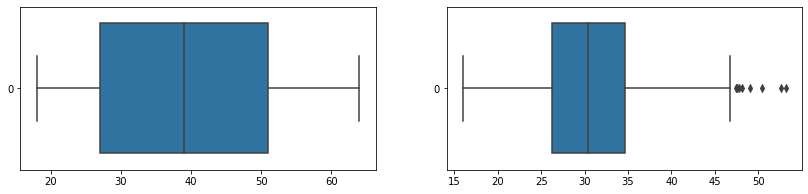

In [89]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=[14,3])

#DIS: This is the weighted distances to five Boston employment centers
sns.boxplot(data=data['age'], orient="h", ax=axs[0])

#This is the proportion of owner-occupied units built prior to 1940
sns.boxplot(data=data['bmi'], orient="h", ax=axs[1])

plt.show()

In [74]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


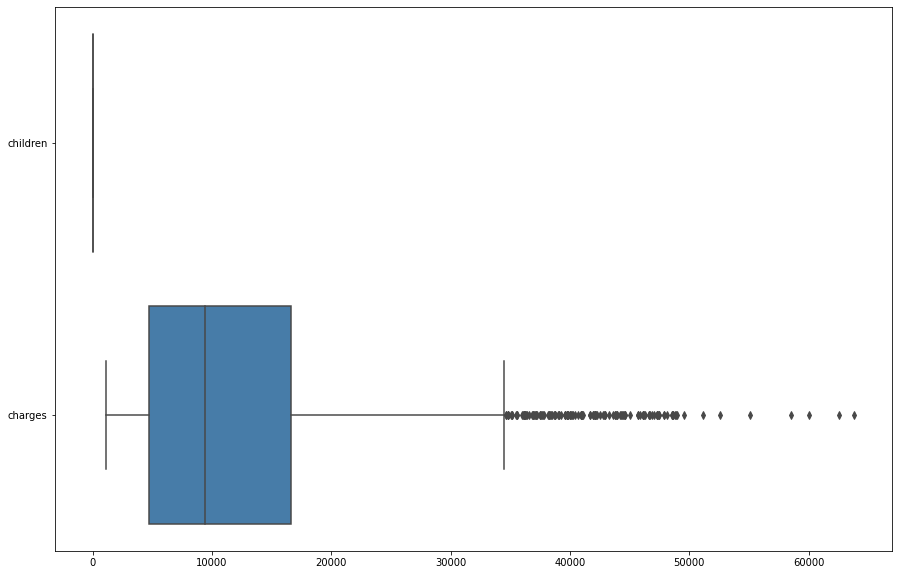

In [87]:
df_1 = data[['children', 'charges']]

ax = sns.boxplot(data=df_1, orient="h", palette="Set1")

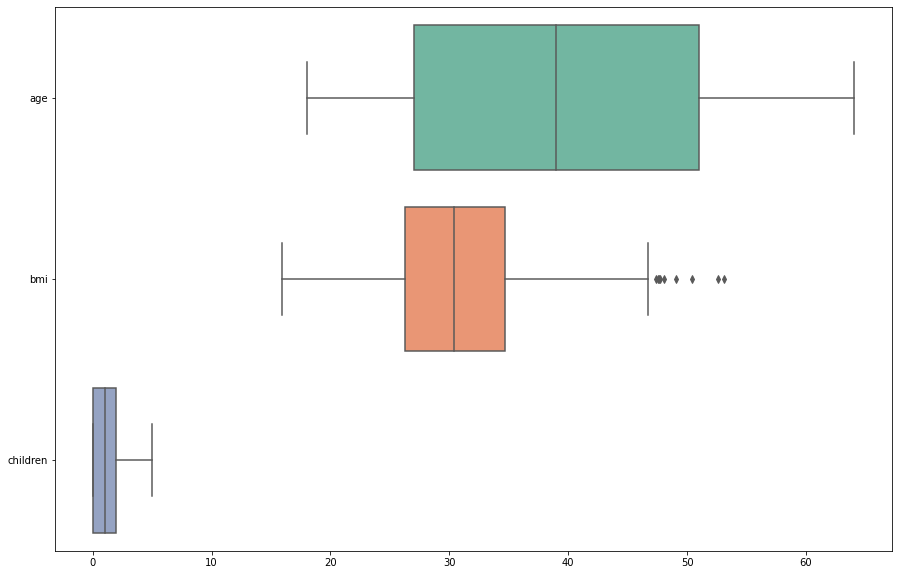

In [88]:
df_2 = data[['age', 'bmi', 'children']]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

<AxesSubplot:>

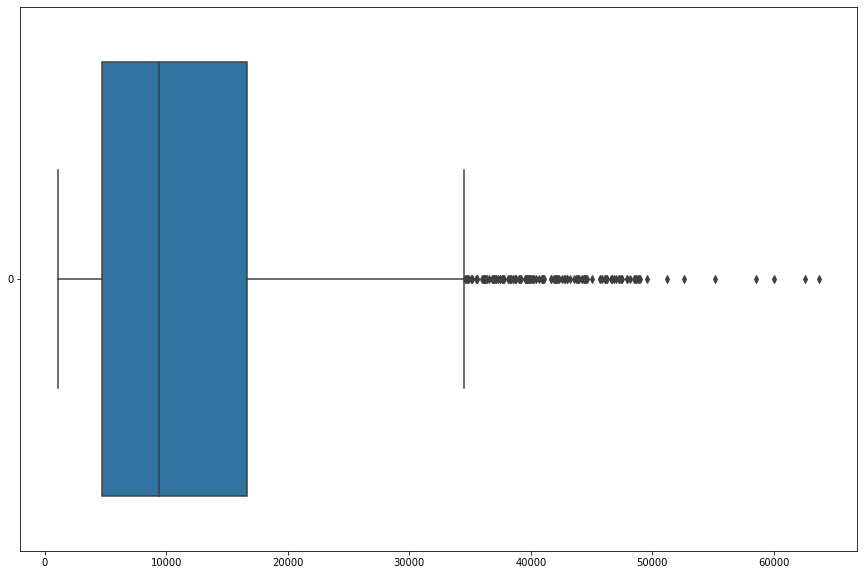

In [90]:
sns.boxplot(data=data['charges'], orient="h")

### Metodo de Turkey

In [82]:
#Tukey's method

def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [84]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, "charges")
# Cálculo directo de outliers probables:

data["charges"][probable_outliers_tm].sort_values()
# outliers probables

1146    52590.82939
819     55135.40209
577     58571.07448
1230    60021.39897
1300    62592.87309
543     63770.42801
Name: charges, dtype: float64

In [94]:
data["charges"][possible_outliers_tm].sort_values() # outliers posibles, necesitan más atención

623     34617.84065
1078    34672.14720
223     34779.61500
689     34806.46770
1291    34828.65400
           ...     
819     55135.40209
577     58571.07448
1230    60021.39897
1300    62592.87309
543     63770.42801
Name: charges, Length: 139, dtype: float64

c:\users\david\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

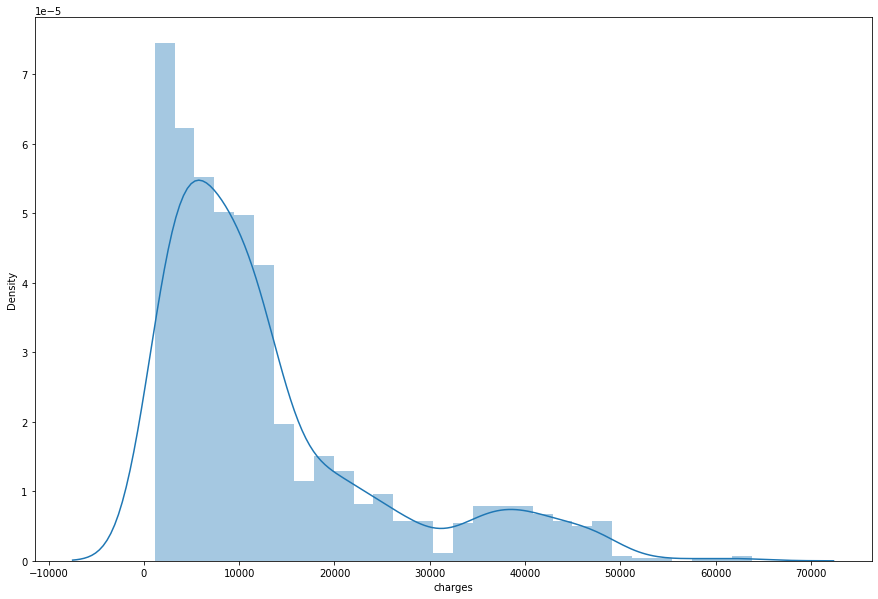

In [96]:
sns.distplot(data['charges'])

c:\users\david\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges_log', ylabel='Density'>

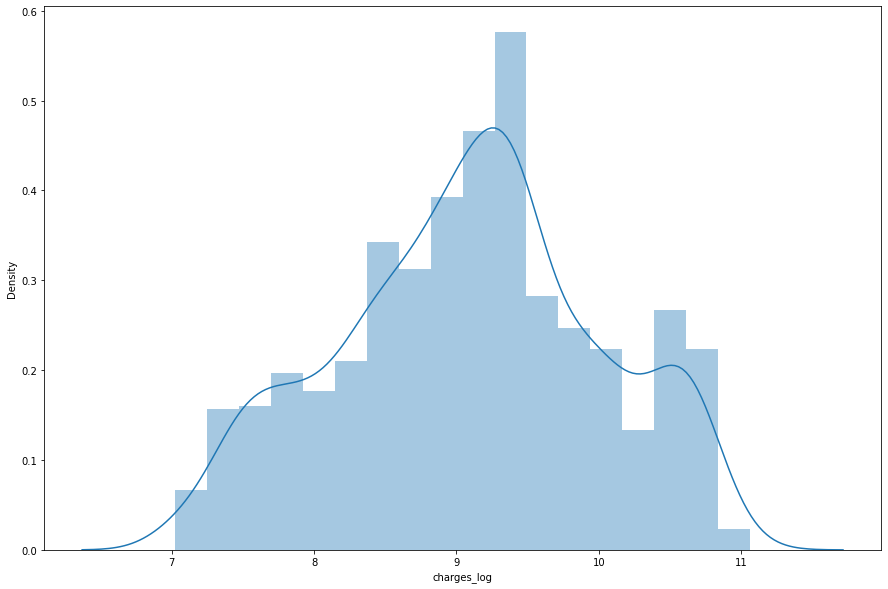

In [99]:
#Transformar 'CRIM' a su valor logaritmo: 
log_CRIM = np.log(data['charges'])
data['charges_man'] = data['charges']+1
log_CRIM = np.log(data['charges_man'])
data['charges_log'] = log_CRIM

#Plot
sns.distplot(data['charges_log'])

In [120]:
#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(data, 'charges_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

[]
[]


## Outliers multivariados

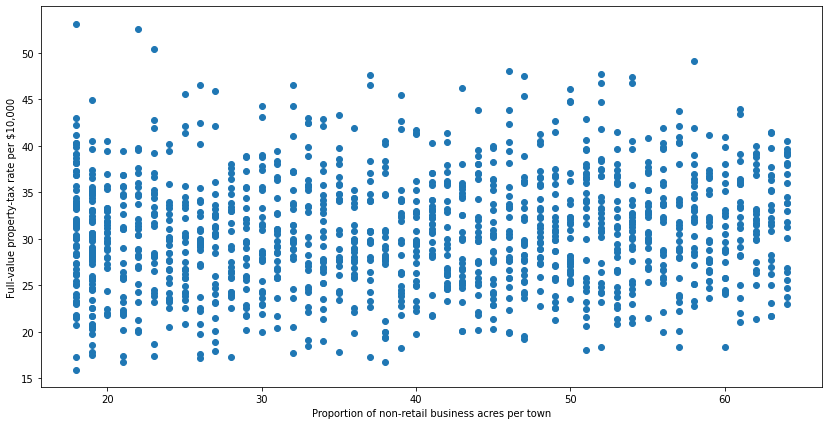

In [122]:
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(data['age'], data['bmi'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

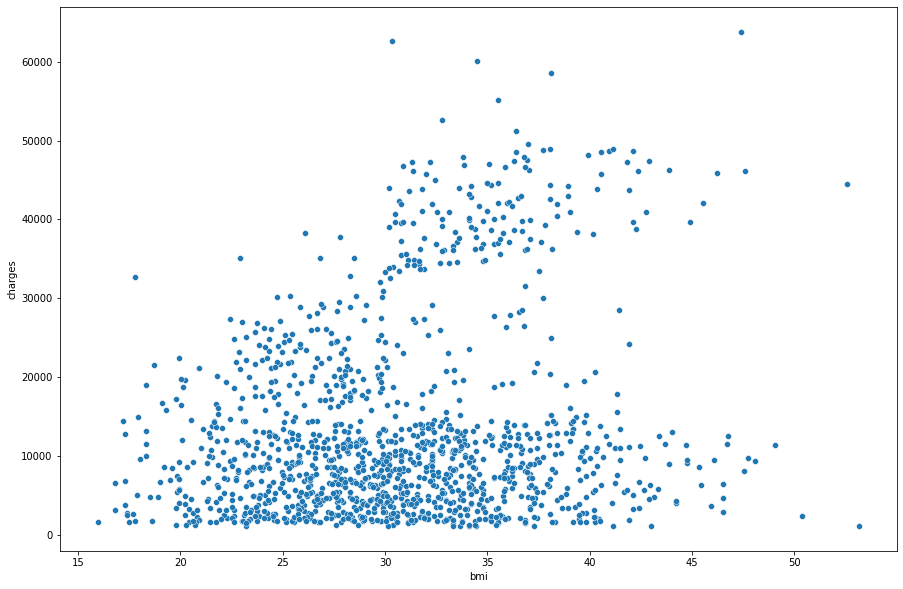

In [123]:
# Otro caso:

df_bivariate = data[["bmi", "charges"]]

ax = sns.scatterplot(x = "bmi", y = "charges", data=data)

### Usando métricas de distancia

In [124]:
# Usando un nivel de significancia de 0.01%, buscamos valores atípicos bivariados.

import scipy as sp
from scipy.stats import chi2

def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [130]:
outliers_mahal_bi, md_bi = mahalanobis_method(df=df_bivariate) # analizando ["LSTAT", "CRIM"]

print(outliers_mahal_bi)  # outliers
#print(md_bi) # distancias

[543, 577, 1047, 1230, 1300, 1317]


In [140]:
# Aplicado a todo el datasset
outliers_mahal, md = mahalanobis_method(df=data) # de las columnas normales
print(outliers_mahal)

#Forma recomendada para filtrar los valores atípicos.

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
df = data

In [22]:
# data['sex'].unique()

array(['female', 'male'], dtype=object)

In [23]:
# data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
# data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
# data['sex'] = data['sex'].replace({'female': 1, 'male': 2})
# data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 2})
# data['region'] = data['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

### Medidas de tendencia central

Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos.

#### Media

La media o el promedio se calcula mediante la suma de todos los datos dividido entre la cantidad de los mismos.

### Univariado
El objetivo del análisis univariado es describir, resumir y analizar el patrón presente en los datos de una variable.

In [8]:
# Serie numérica discreta:
print(('\n Variable numérica:'))
print(data['sex'].value_counts())  # Tabla de frecuencias de la variable 'sex'

# Serie categórica:
print(('\n Variable categórica:'))
print(data['smoker'].value_counts(sort=False)) # Tabla de frecuencias de la variable 'smoker'

# Serie categórica:
print(('\n Variable categórica:'))
print(data['region'].value_counts(sort=False)) # Tabla de frecuencias de la variable 'region'


 Variable numérica:
male      676
female    662
Name: sex, dtype: int64

 Variable categórica:
no     1064
yes     274
Name: smoker, dtype: int64

 Variable categórica:
northeast    324
southeast    364
northwest    325
southwest    325
Name: region, dtype: int64


In [9]:
#Calcular proporciones:
print(('\nFrecuencias porcentuales:'))
tab = pd.crosstab(index=data['sex'], columns='count')
prop = tab / tab.sum()
prop


Frecuencias porcentuales:


col_0,count
sex,
female,0.494768
male,0.505232


In [10]:
#Calcular proporciones:
print(('\nFrecuencias porcentuales:'))
tab = pd.crosstab(index=data['smoker'], columns='count')
prop = tab / tab.sum()
prop


Frecuencias porcentuales:


col_0,count
smoker,
no,0.795217
yes,0.204783


In [11]:
#Calcular proporciones:
print(('\nFrecuencias porcentuales:'))
tab = pd.crosstab(index=data['region'], columns='count')
prop = tab / tab.sum()
prop


Frecuencias porcentuales:


col_0,count
region,
northeast,0.242152
northwest,0.242900
southeast,0.272048
southwest,0.242900


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:ylabel='Frequency'>

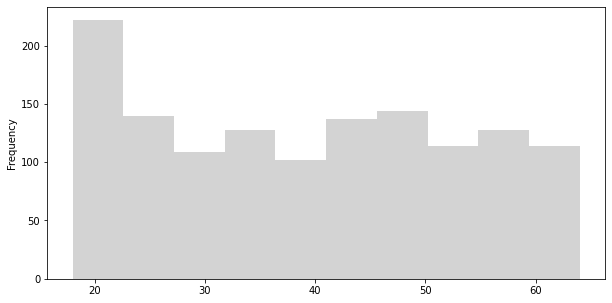

In [47]:
##########################################
# Histogram
##########################################

data['age'].plot.hist(figsize=(10,5), color = 'lightgray')  # Variable entera

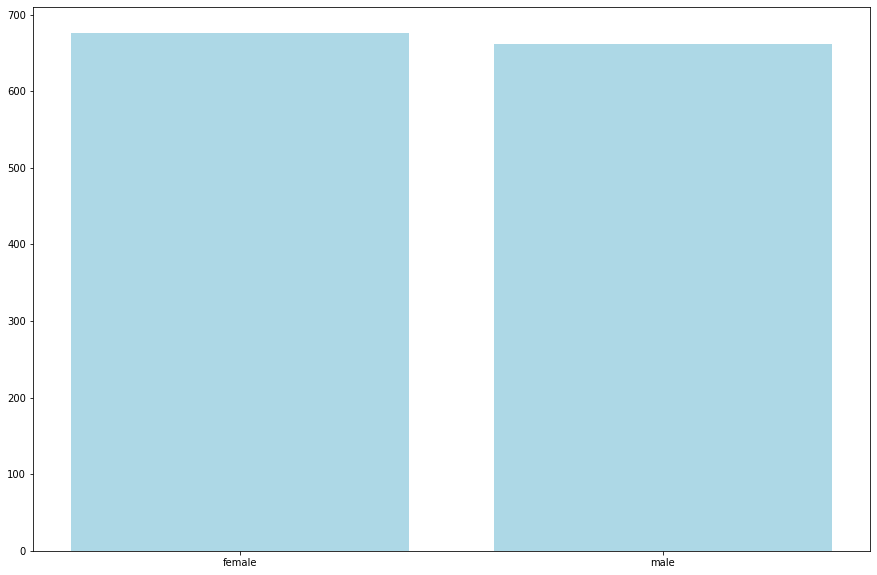

In [46]:
fig, ax = plt.subplots()
ax.bar(data['sex'].unique(), data['sex'].value_counts(), color = 'lightblue')
plt.show()

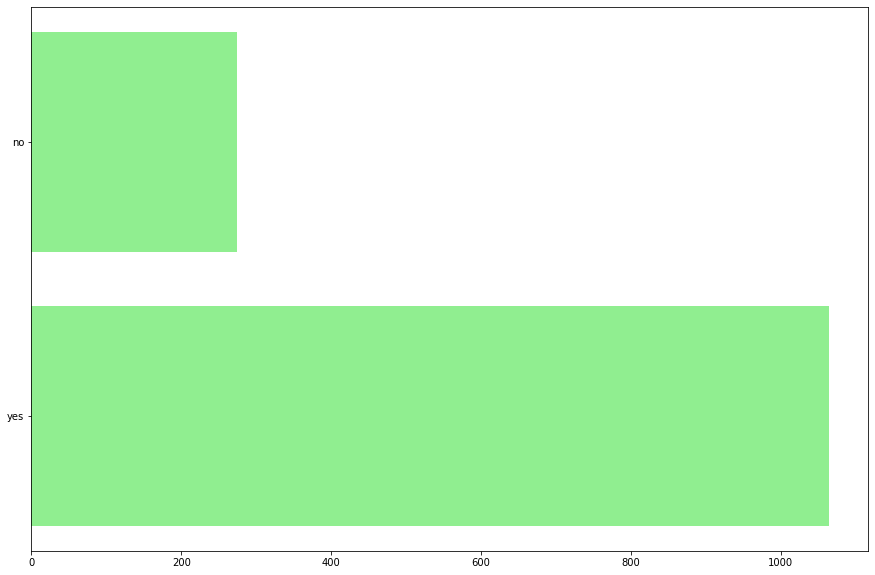

In [50]:
fig, ax = plt.subplots()
ax.barh(data['smoker'].unique(), data['smoker'].value_counts(), color = 'lightgreen')
plt.show()

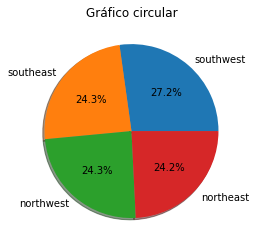

In [64]:
#Configurar las características del gráfico
plt.pie(data['region'].value_counts(), labels=data['region'].unique(), shadow=True, autopct='%1.1f%%')
#Definir título
plt.title('Gráfico circular')
#Mostrar figura
plt.show()

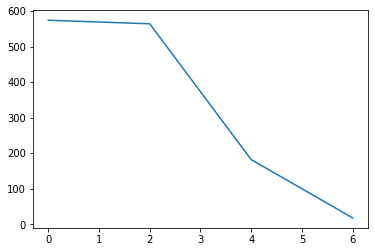

In [65]:
# Variable numérica:

counts, bins = np.histogram(data['children'], bins=range(-1,9,2))
plt.plot(bins[:-1]+1, counts)

### Bivariado

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Tabla de frecuencias para dos variables

pd.crosstab(index=data['sex'], columns=data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [16]:
# Tabla de frecuencias para dos variables

pd.crosstab(index=data['sex'], columns=data['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [17]:
# Tabla de frecuencias para dos variables

pd.crosstab(index=data['region'], columns=data['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


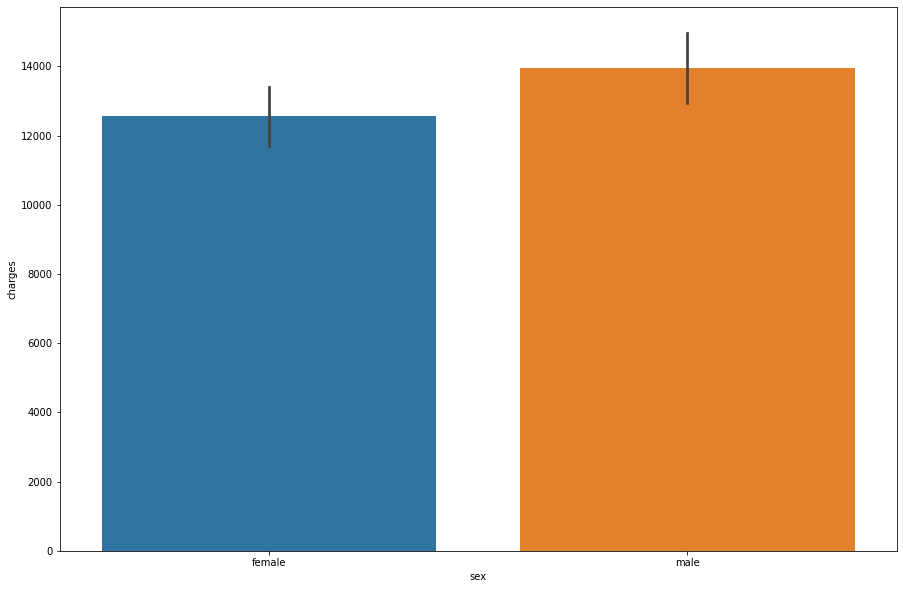

In [28]:
# Gráfica de barras:

ax = sns.barplot(x="sex", y="charges", data=data)

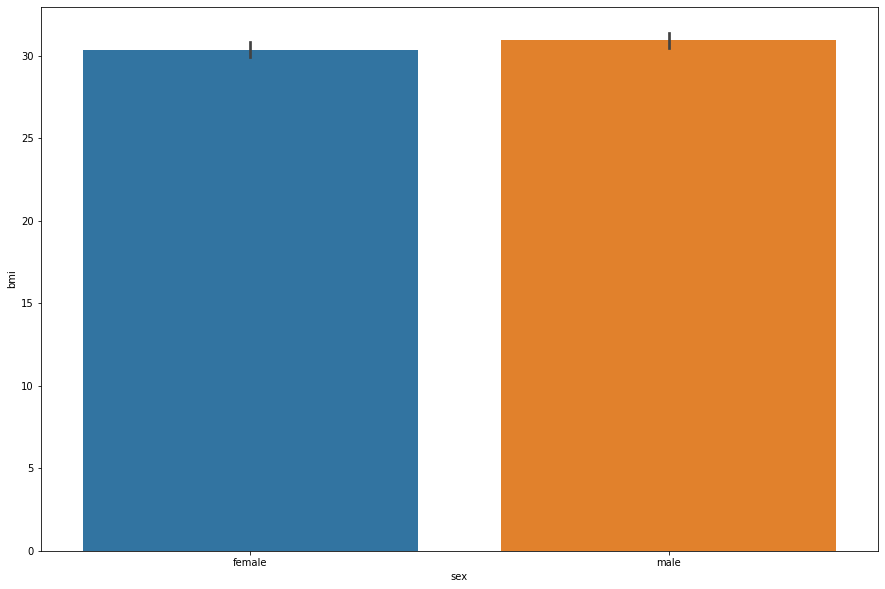

In [35]:
# Gráfica de barras:

ax = sns.barplot(x="sex", y="bmi", data=data)

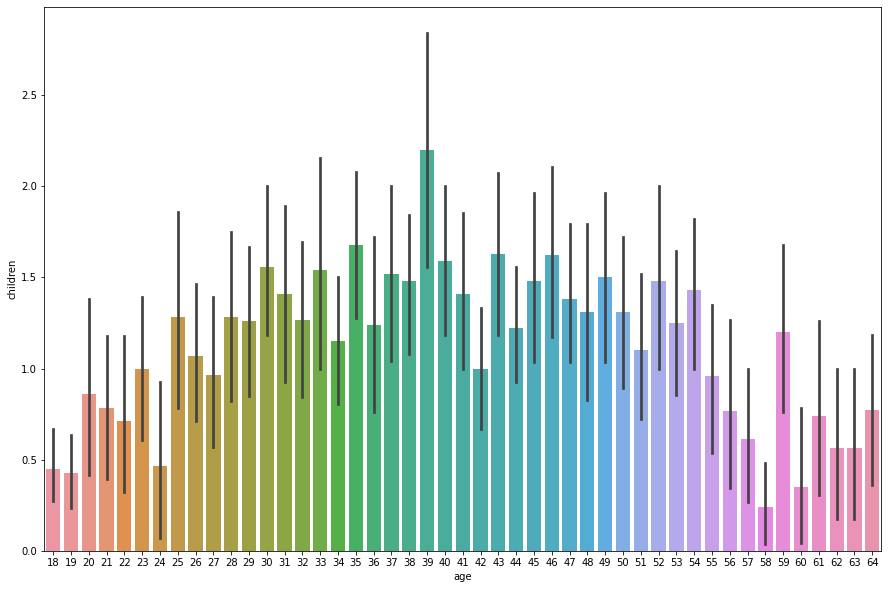

In [31]:
# Gráfica de barras:

ax = sns.barplot(x="age", y="children", data=data)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

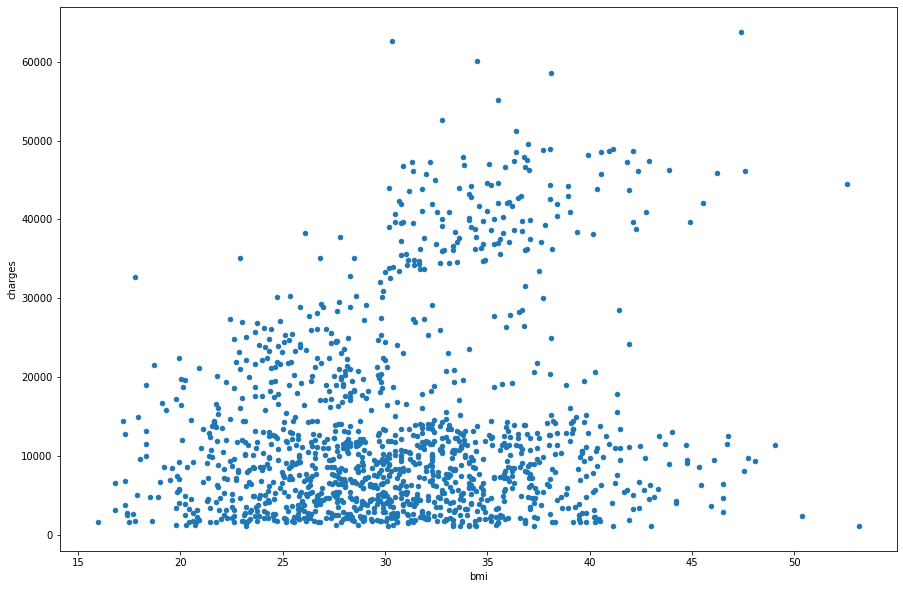

In [41]:
# Diagrama de dispersión

data.plot(kind='scatter', x='bmi', y='charges')

<AxesSubplot:>

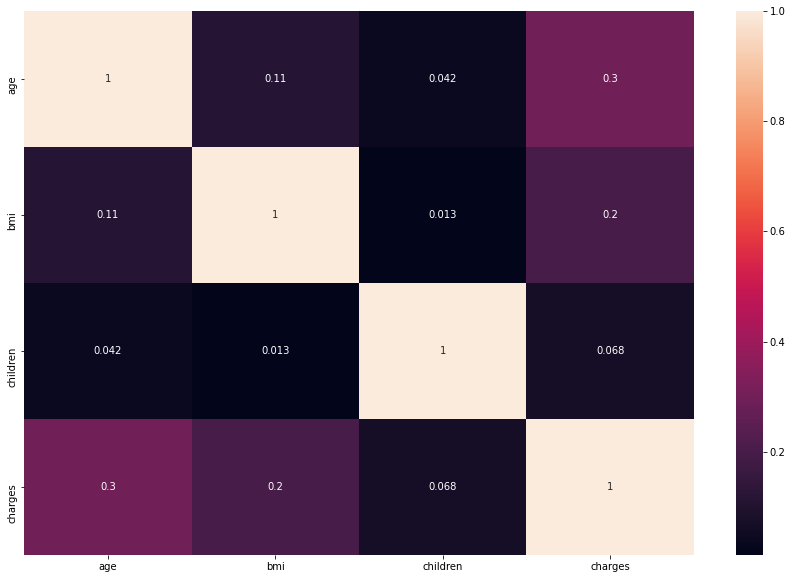

In [55]:
# correlación
#Using the correlation method

plt.rcParams['figure.figsize'] = (15.0, 10.0)  # dimensión
sns.heatmap(data.corr(), annot=True)  # annot_True para presentar el coeficiente de correlación

## Analisis de regresion multiple


In [20]:
from sklearn import *

In [21]:
data.shape

(1338, 7)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
print(data.keys())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [24]:
x = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

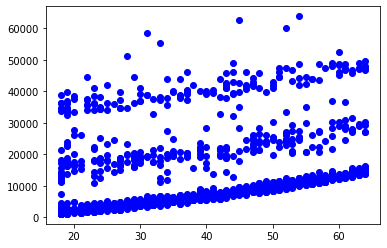

In [25]:
plt.scatter(x['age'], y, label='data', color='blue')

In [26]:
data_DF = pd.DataFrame(x, )
data_DF = pd.merge(data_DF, pd.DataFrame(y), right_index=True, left_index=True)

In [27]:
data_DF.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data_DF

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,10600.54830
1334,18,1,31.920,0,2,4,2205.98080
1335,18,1,36.850,0,2,2,1629.83350
1336,21,1,25.800,0,2,1,2007.94500


In [28]:
corrMatrixM = data_DF.corr()

corrMatrixM.charges.sort_values(axis=0, ascending=True)  

smoker     -0.787251
region      0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

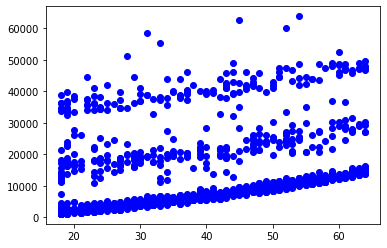

In [29]:
plt.scatter(x['age'], y, label='data', color='blue')

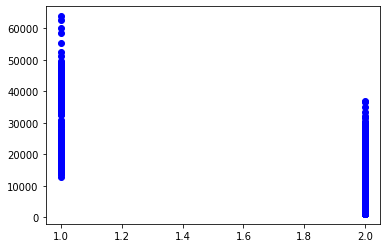

In [30]:
plt.scatter(x['smoker'], y, label='data', color='blue')

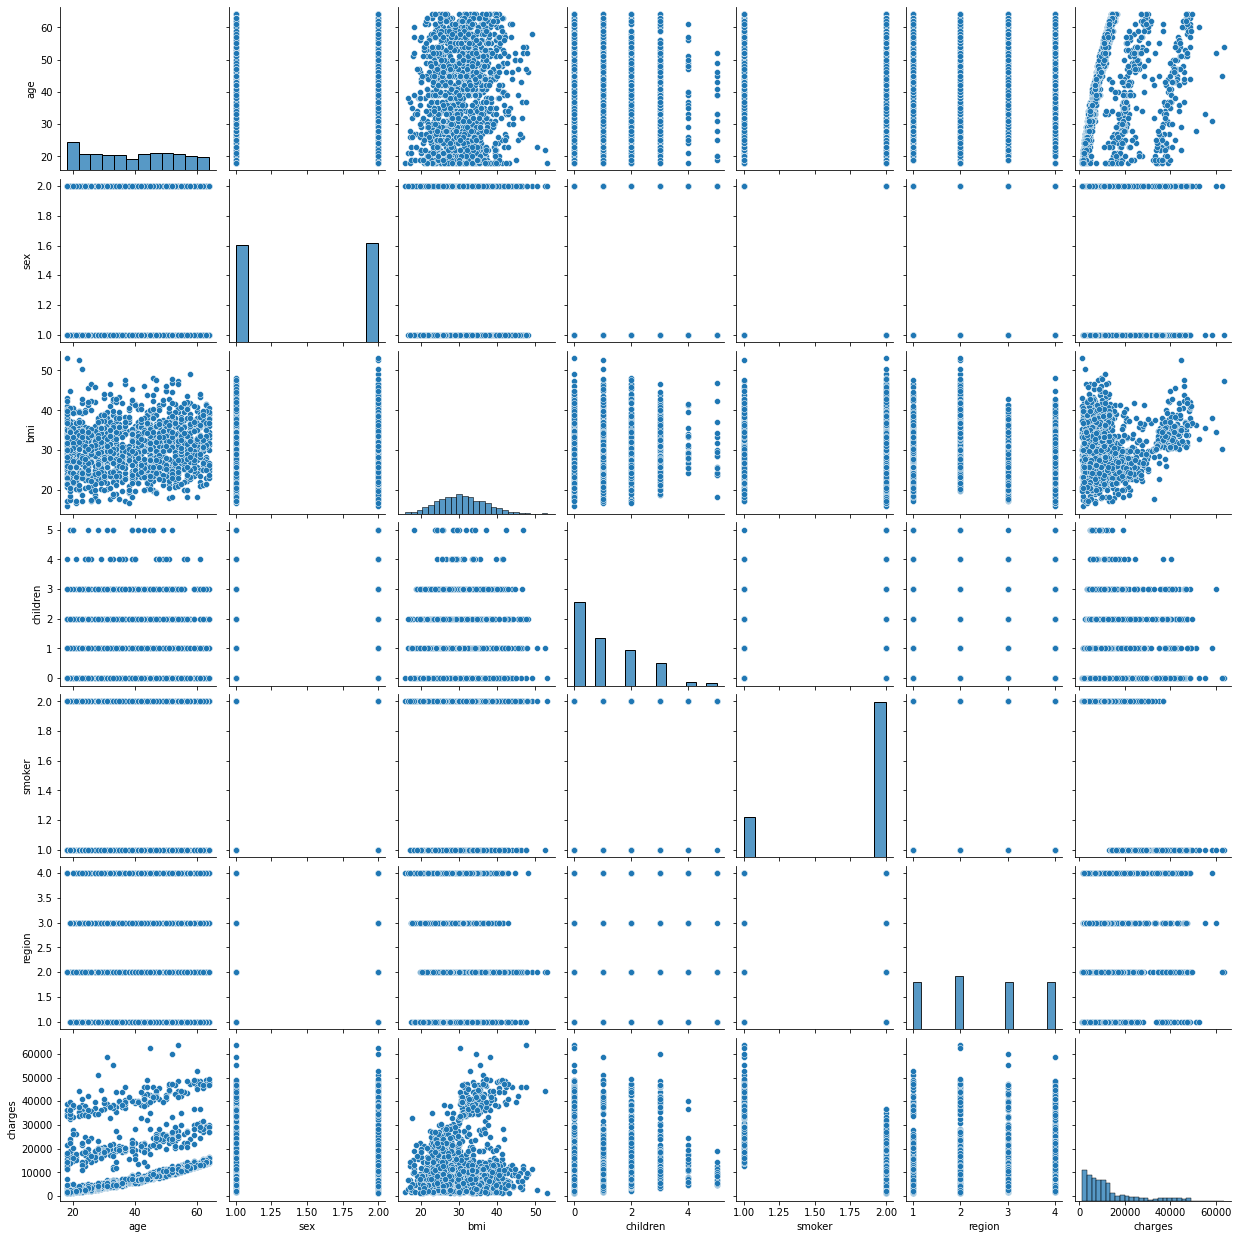

In [31]:
sns.pairplot(data_DF)

In [32]:
from sklearn.model_selection import train_test_split as tts

x_ent, x_test, y_ent, y_test = tts(x, y, train_size=0.8, random_state=42, shuffle=True)
print(x_ent.shape, x_test.shape)

(1070, 6) (268, 6)


In [33]:
lm = LinearRegression()
lm.fit(x_test, y_test)

LinearRegression()

In [34]:
print('a = ' + str(lm.intercept_) , 'y  B = ' + str(lm.coef_) )

a = 35580.40129968633 y  B = [   252.94105642   -523.87280746    321.60788758    773.31356791
 -24608.66183829    754.90982479]


In [35]:
y_predict = lm.predict(x_test)

print(y_predict)

[ 9884.29735963  6864.48110654 37547.25179714  9815.08584764
 27260.32716456  9240.52969664   150.81595101 15958.83607256
  1501.794071   11521.04424585 28434.30852476  9335.25721295
  4974.00606303 39009.13683446 39770.47164142 37392.08142631
 15015.9880079  36399.72644555  8778.72787537 32235.48961222
  3946.76459639  8977.75153026   653.00168757  7225.14932139
 12114.54161381 13027.80692794 13059.01488008  7030.16329974
 10848.47071229  1071.35240516  9228.12227525 12756.74552854
  3875.25369017  4428.18404377  3068.25949542 12518.92081169
  1169.63862546  7859.96947334 34399.24295767 32633.60273817
  4464.54813694  4000.48556754 13045.6897436  10691.72062946
  8216.31563669 10611.29463847  5777.99687017  3052.65342306
 36198.4553424   8559.47834707 14958.67733924  1597.02789964
 12315.8888186   1289.91638609 12062.81038702 12855.48053468
  4111.33981794 33409.93202772 11909.91699206 12958.18236744
 12756.53202032 10351.61540637 15429.63172036  8309.45886693
 11941.422578    4300.49

In [36]:
x_test[0:]

,age,sex,bmi,children,smoker,region
764,45,1,25.175,2,2,4
887,36,1,30.020,0,2,3
890,64,1,26.885,0,1,3
1293,46,2,25.745,3,2,3
259,19,2,31.920,0,1,3
...,...,...,...,...,...,...
109,63,2,35.090,0,1,2
575,58,1,27.170,0,2,3
535,38,2,28.025,1,2,4
543,54,1,47.410,0,1,2


In [37]:
lm.score(x_test, y_test)

0.7874243555939862

In [38]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 33002099.140079953
Raíz del Error Cuadrático Medio (RMSE) = 5744.745350324934


<AxesSubplot:>

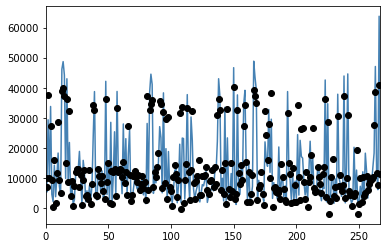

In [39]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#  Calcular the VIF para todo el dataset (si ya se conoce cuál es la variable dependiente, se elimina esa variable)

vifF1 = pd.DataFrame()


vifF1["features"] = data_DF.columns
vifF1["vif_Factor"] = [variance_inflation_factor(data_DF.values, i) for i in range(data_DF.shape[1])]
print(vifF1)

   features  vif_Factor
0       age   11.935697
1       sex    9.137272
2       bmi   27.685253
3  children    1.845788
4    smoker   35.513951
5    region    5.805093
6   charges    6.046955


In [41]:
#  Calcular the VIF para cada variable independiente:

vifF2 = pd.DataFrame()

x_DF2 = data_DF.drop('smoker', axis=1)
x_DF2.head()

vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

   features  vif_Factor
0       age    8.582155
1       sex    8.469422
2       bmi   13.526288
3  children    1.812613
4    region    5.045592
5   charges    2.474559


In [42]:
x_DF2 = x_DF2.drop('bmi', axis=1)
x_DF2.head()

,age,sex,children,region,charges
0,19,1,0,1,16884.92400
1,18,2,1,2,1725.55230
2,28,2,3,2,4449.46200
3,33,2,0,3,21984.47061
4,32,2,0,3,3866.85520


In [43]:
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

   features  vif_Factor
0       age    6.749271
1       sex    6.166890
2  children    1.790400
3    region    4.744656
4   charges    2.436733


(1070, 5) (268, 5)
a = -5.4569682106375694e-12 y  B = [-3.68831965e-13 -7.99693645e-13 -9.83503799e-13 -8.56011480e-14
  1.00000000e+00]
****************************************
Coeficiente R^2:  1.0
****************************************
Error Cuadrático Medio (MSE) = 4.0136180669387647e-22
Raíz del Error Cuadrático Medio (RMSE) = 2.0034016239732773e-11


<AxesSubplot:>

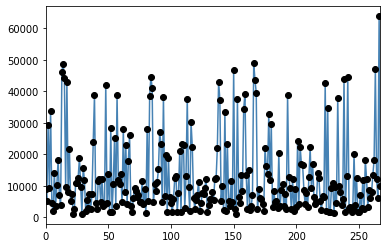

In [44]:
# 80% de las observaciones quedan para el conjunto de entrenamiento y 20% para el conjunto de prueba:

x_new = data_DF.drop(['smoker', 'bmi'], axis=1)

x_ent, x_test, y_ent, y_test = tts(x_new, y, train_size=0.8, random_state=42, shuffle=True)

print(x_ent.shape, x_test.shape)


# Crear una instancia y entrenar el modelo con los conjuntos de datos de entrenamiento:

lmI = LinearRegression()
lmI.fit(x_ent, y_ent)


# Coeficientes de la función de regresión:
print('a = ' + str(lmI.intercept_) , 'y  B = ' + str(lmI.coef_) )

# Utilizar el modelo para generar las predicciones:

y_predict = lmI.predict(x_test)

# Verificar el R^2 (sobre el conjunto de test):

print(40*'*')
print('Coeficiente R^2: ', lmI.score(x_test, y_test)) 
print(40*'*')


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

In [45]:
# Guardar el modelo de regresión original con las 13 variables independientes:

import joblib

joblib.dump(lm, "medical.pkl")

['medical.pkl']

In [46]:
# Utilizar el modelo entrenado que hemos guardado

lm = joblib.load("medical.pkl")
lm.score(x, y)  # R^2 = 0.74

0.747396810654084

## Aplicación de Mínimos cuadrados ordinarios (OLS)

In [47]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [48]:
x_ent, x_test, y_ent, y_test = tts(x, y, train_size=0.8, random_state=42, shuffle=True)


ols = sm.OLS(y_ent, x_ent)
res_ols = ols.fit()
print(res_ols.summary())

print('Parameters: ', res_ols.params)
print('R2: ', res_ols.rsquared)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              885.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:32:56   Log-Likelihood:                         -11042.
No. Observations:                1070   AIC:                                  2.210e+04
Df Residuals:                    1064   BIC:                                  2.213e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
# Evaluación con el set test:
# Utilizar el modelo para generar las predicciones:

y_predictOLS = res_ols.predict(x_test)


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictOLS)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print(40*'*')
print('R2: ', res_ols.rsquared)

Error Cuadrático Medio (MSE) = 51728489.43691238
Raíz del Error Cuadrático Medio (RMSE) = 7192.252042087539
****************************************
R2:  0.8330993021507356


## Mínimos cuadrados ponderados (WLS)

In [50]:
from scipy import stats
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


In [63]:
nsample = len(x_ent)
w = np.ones(nsample)
w[nsample * 6//10:] = 2

mod_wls = sm.WLS(y_ent, x_ent, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.839
Model:                            WLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              923.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):                        0.00
Time:                        19:53:12   Log-Likelihood:                         -11136.
No. Observations:                1070   AIC:                                  2.228e+04
Df Residuals:                    1064   BIC:                                  2.231e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
# Evaluación con el set test:
# Utilizar el modelo para generar las predicciones:

y_predictWLS = res_wls.predict(x_test)


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictWLS)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print(40*'*')
print('R2: ', res_wls.rsquared)

Error Cuadrático Medio (MSE) = 51623333.9341834
Raíz del Error Cuadrático Medio (RMSE) = 7184.937990976916
****************************************
R2:  0.838958562634571


### Resumen de resultados:

<AxesSubplot:>

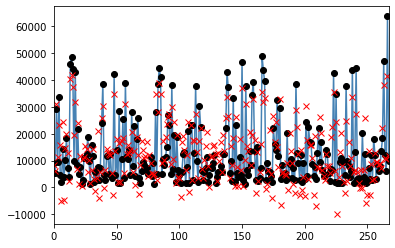

In [55]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')
pd.Series(y_predictOLS.tolist()).plot(marker="x", linewidth=0, color='red')

<AxesSubplot:>

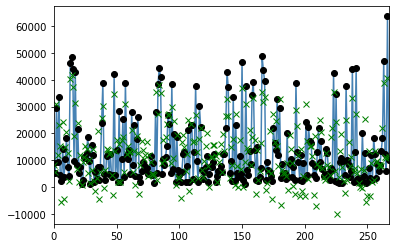

In [56]:
pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')
pd.Series(y_predictWLS.tolist()).plot(marker="x", linewidth=0, color='green')

In [57]:
# Presentar valor real, valor predicho 1 (LinearRegression), valor predicho 2 (modelo OLS), valor predicho 3 (modelo WLS)

y_values = pd.DataFrame([y_test, y_predict, y_predictOLS, y_predictWLS]).transpose()
y_values.columns = ['y_real','y_lm', 'y_ols', 'y_wls']
y_values.head()

,y_real,y_lm,y_ols,y_wls
764,9095.06825,NaN,8410.309278,8292.599748
887,5272.17580,NaN,6051.221542,5607.302840
890,29330.98315,NaN,30937.464776,31133.801609
1293,9301.89355,NaN,11373.932868,11822.644057
259,33750.29180,6113.23105,23230.694201,23047.114895


NameError: name 'y_lm' is not defined

In [59]:
data_DF = pd.DataFrame(x, )
data_DF = pd.merge(data_DF, pd.DataFrame(y), right_index=True, left_index=True)


data_DF.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data_DF.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,1,1,16884.924


#### ¿Cuál modelo predice mejor?

In [60]:
new_obs1 = [0.00632, 18, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]
new_obs2 = [0.0063, 17.8, 2.29, 0.1, 0.535, 6.56, 65.1, 4.07, 1.0, 294.0, 15.1, 395.9, 4.96]

print('Modelo de regresión mínimos cuadrados:')

print(lm.predict([new_obs1]))
print(lm.predict([new_obs2]))

print('\nModelo de regresión OLS:')
print(res_ols.predict(new_obs1))
print(res_wls.predict(new_obs1))

print('\nModelo de regresión WLS:')
print(res_ols.predict(new_obs2))
print(res_wls.predict(new_obs2))

Modelo de regresión mínimos cuadrados:


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 13)